# A/B-тест для интернет магазина

**Целью** работы является проанализировать результаты A/B-теста.

**Задачи**:

- приоритизируйте гипотезы;
- запустите A/B-тест;
- проанализировать результаты.

# Часть 1. Приоритизация гипотез.


## Задача

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Данные для первой части

- Hypothesis — краткое описание гипотезы;

- Reach — охват пользователей по 10-балльной шкале;

- Impact — влияние на пользователей по 10-балльной шкале;

- Confidence — уверенность в гипотезе по 10-балльной шкале;

- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('max_colwidth', 200)
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [3]:
data['ICE'] = round(data.Impact * data.Confidence / data.Efforts, 2)
data.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**


In [4]:
data['RICE'] = (data.Reach * data.Impact * data.Confidence) / data.Efforts
data.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.**

Приоритизация гипотез изменилась, так как включился параметр охвата аудитории, и где охват наибольший, он стал первым.Таким образом, больше людей попадет под тестирование. Первой гипотезой следует проверить следующую гипотезу: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

# Часть 2. Анализ A/B-теста

Я провел A/B-тест и получил результаты, которые описаны в файлах orders.csv и visitors.csv.

**Задача**

Проанализируйте A/B-тест:

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

- Постройте точечный график количества заказов по пользователям.

- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

- Постройте точечный график стоимостей заказов.

- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

**Примите решение** по результатам теста и объясните его. Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.

2. Остановить тест, зафиксировать отсутствие различий между группами.

3. Продолжить тест.

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
orders.sample(10)

,transaction_id,visitor_id,date,revenue,group
98,1962247337,2706377257,2019-08-01,7129,A
65,2321477056,2868887864,2019-08-16,1710,B
326,4185696070,235366767,2019-08-28,780,A
411,1696190144,1687240555,2019-08-06,24744,B
654,2178722073,816783716,2019-08-07,34550,B
493,128480032,3504688413,2019-08-26,8585,A
181,1532499979,2617784228,2019-08-23,3468,B
995,3465107905,2075883701,2019-08-31,2610,B
1060,2518195580,4163850406,2019-08-11,8950,A
1002,3143229464,282188993,2019-08-08,1120,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print('Количество дубликатов:',orders.duplicated().sum())

Количество дубликатов: 0


In [8]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.sample(10)

,date,group,visitors
21,2019-08-22,A,609
50,2019-08-20,B,560
2,2019-08-03,A,507
20,2019-08-21,A,646
4,2019-08-05,A,756
45,2019-08-15,B,544
59,2019-08-29,B,531
61,2019-08-31,B,718
13,2019-08-14,A,735
31,2019-08-01,B,713


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print('Количество дубликатов:',visitors.duplicated().sum())

Количество дубликатов: 0


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Постройте график кумулятивной выручки по группам.**

In [12]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [13]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


In [14]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


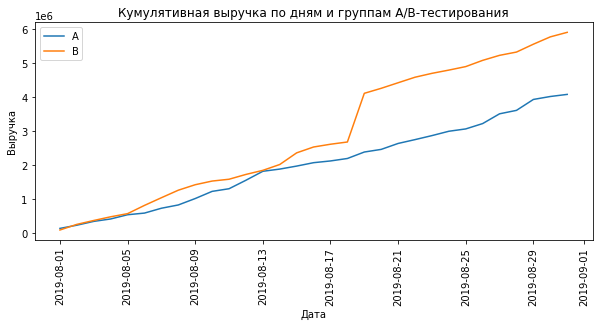

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 4))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title("Кумулятивная выручка по дням и группам A/B-тестирования")
plt.xticks(rotation=90)
plt.legend();

У группы В кумулятивная выручка практически всегда выше, чем у группы А, особенно скачок сильный произошел 18 августа. Динамика на протяжении всего месяца восходящая у обоих групп, но у группы В было ускорение после 18 августа

**Постройте график кумулятивного среднего чека по группам.**

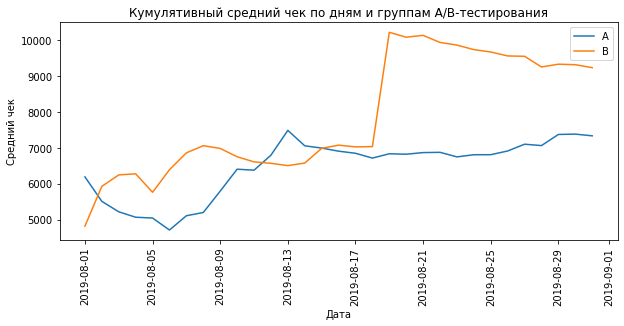

In [16]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title("Кумулятивный средний чек по дням и группам A/B-тестирования")
plt.legend();

Средний чек группы В выше, чем у группы А, 18 августа средний чек группы В резко вырос, теперь понятно, почему выручка также резко увеличилась у группы В

**Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.**

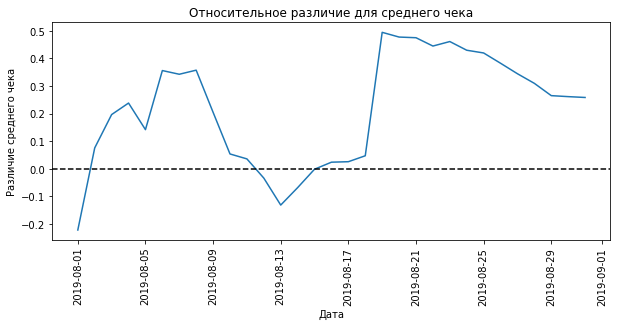

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 4))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Различие среднего чека')
plt.title("Относительное различие для среднего чека")
plt.xticks(rotation=90);

Относительное изменение кумулятивного среднего чека группы В к группе А в основном выше 0, что говорит о том, что средний чек группы В выше среднего чека группы А, особенно 18-24 августа. Возможно, что такой скачок идёт из-за возврата из отпусков и скоро первое сентября, детей собирают к школе

**Постройте график кумулятивного среднего количества заказов на посетителя по группам.**

Кумулятивное среднее количество заказов на протяжении 75% августа у группы В преобладает над группой А

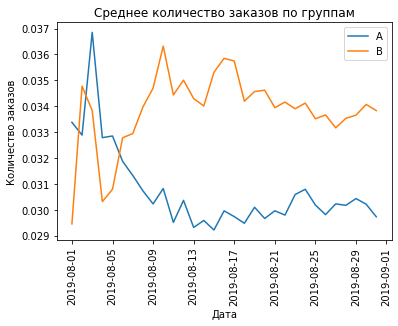

In [18]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.title("Среднее количество заказов по группам")
plt.xticks(rotation=90)
plt.show()

В начале теста сегмент А имел большее среднее количество заказов, затем он немного упал и установился примерно около одного значения, в отличие от сегмента В, который возрос выше сегмента А и также установился в пределах одного значения.

Построим график относительного различия кумулятивного среднего количества заказов группы B к группе A. Добавим пунктирную линию оси X чёрного цвета ('black') со значением оси Y = 0 методом plt.axhline(). И ещё одну линию оси X серого цвета ('grey') со значением оси Y = 0.2

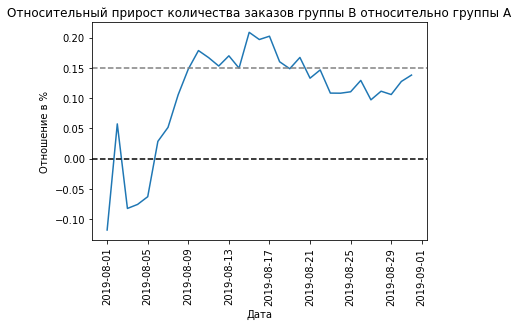

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Отношение в %')
plt.title("Относительный прирост количества заказов группы В относительно группы А")
plt.xticks(rotation=90);

Почти с самого начала теста группа B лидирует относительно группы А. Но не стоит говорить, что она зафиксировалась возле определенной цифры, но прирост становится примерно на 15%.

Построим точечный график количества заказов по пользователям.

      visitor_id  transaction_id
1023  4256040402              11
591   2458001652              11
569   2378935119               9
487   2038680547               8
44     199603092               5
744   3062433592               5
55     237748145               5
917   3803269165               5
299   1230306981               5
897   3717692402               5


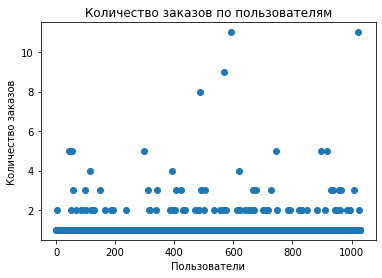

In [20]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'transaction_id']

print(ordersByUsers.sort_values(by='transaction_id', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transaction_id']) 
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям")
plt.show()

Пользователи, которые сделали более 2 заказов встречаются редко. Для того, чтобы узнать аномалия это или нет, посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

      visitor_id  transaction_id
1023  4256040402              11
591   2458001652              11
569   2378935119               9
487   2038680547               8
44     199603092               5
744   3062433592               5
55     237748145               5
917   3803269165               5
299   1230306981               5
897   3717692402               5


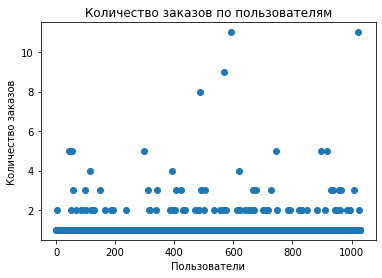

In [21]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'transaction_id']

print(ordersByUsers.sort_values(by='transaction_id', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transaction_id']) 
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям")
plt.show()

Пользователи, которые сделали более 2 заказов встречаются редко. Для того, чтобы узнать аномалия это или нет, посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [22]:
print(ordersByUsers.sort_values(by='transaction_id', ascending=False).head(10))

print(np.percentile(ordersByUsers['transaction_id'], [ 95, 99]))

      visitor_id  transaction_id
1023  4256040402              11
591   2458001652              11
569   2378935119               9
487   2038680547               8
44     199603092               5
744   3062433592               5
55     237748145               5
917   3803269165               5
299   1230306981               5
897   3717692402               5
[2. 4.]


Считать за выбросы буду 99 перцентиль. 

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз.

Построим точечный график стоимостей заказов.

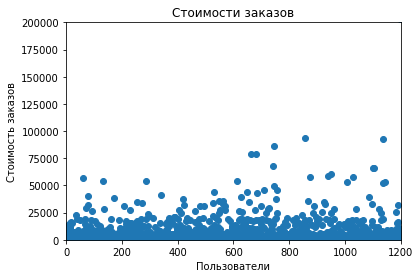

In [23]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.axis([0, 1200, 0, 200000])
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title("Стоимости заказов")
plt.show()

Есть 2 выброса в районе 1 250 000, который выглядит весьма аномально, и 200 000. Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [24]:
print(orders.head(10))
print(np.percentile(orders['revenue'] , [95, 99]))

   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
2      2961555356  4069496402 2019-08-15      400     A
3      3797467345  1196621759 2019-08-15     9759     B
4      2282983706  2322279887 2019-08-15     2308     B
5       182168103   935554773 2019-08-15     2210     B
6       398296753  2900797465 2019-08-15     1860     B
7      2626614568    78758296 2019-08-15     1044     A
8      1576988021   295230930 2019-08-15    13710     A
9      1506739906  1882260405 2019-08-15     1855     B
[28000.  58233.2]


99 перцентиль буду считать границей выбросов, соответственно свыше 58233.2.

Не более 5% пользователей оформляли заказы на сумму более 28 000. И 1% пользователей заказывали на сумму более 58 233.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'transaction_id'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. Посчитаем статистическую значимость различия среднего количества заказов по результатам двух недель теста.

Для расчета р-value, используем тест Уилкоксона-Манна-Уитни, так как у нас имеются выбросы, а сам тест работает с рангами, не учитывая сами значения. Так же сформируем нулевую и альтернативную гипотезы. Нулевая гипотеза говорит о том, что статистическая значимость в количестве заказов и среднемк чеке не значительна и сделать вывод о различии нельзя, альтернативная гипотеза говорит о том, что статистическая значимость в количестве заказов и среднемк чеке значитаельная и между выборками имеется статистическая значимость. Порогом статистической значимости установим alpha=.05

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


In [28]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

--------------------------------

In [29]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id'] 
sampleA = pd.concat([ordersByUsersA['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])), name='orders')],axis=0)
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительные различия: 0.138


P-value значительно меньше 0.05, значит стоит отвергнуть нулевую гипотезу. Анализ "сырых данных" сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к группе А равен 13.8%.

Сравним среднее количество заказов по сырым данным, а затем проделаем те же самые действия с выборкой без выбросов.

In [30]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительные различия: 0.259


P-value значительно больше 0.05, соответственно мы не можем отвергнуть нулевую гипотезу, статистически значимых отличий в среднем чеке между группами нет. Относительное различие между чеками около 26%. Почистим данные и посчитаем те же метрики.

Приступаем к подготовке очищенных от аномалий данных. Напомним, что 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя. Ранее указывал, что аномалии для меня это 99 перцентиль, а именно те, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 58 233 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и с наибольшей стоимостью.

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > np.percentile(ordersByUsers['transaction_id'], 99)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > np.percentile(ordersByUsers['transaction_id'], 99)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'] , 99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.014
Относительные различия: 0.153


Здесь следует отвергнуть нулевую гипотезу, т.к. P-Value меньше 0.05 (0.014)

Как и в случае с сырым данными, статистическая значимость достигнута. Сегмент В лучше сегмента А.

Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.

In [33]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.851
Относительные различия: -0.006


P-value увеличился, и мы не можем отвергнуть нулевую гипотезу, но и разница между сегментами сократилась с 15.3 % до -0.6 %. После удаления выбросов в данных меньше шума.

**Выводы**

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

- По сырым данным нет статистически значимого различия по среднему чеку между группами, как и после удаления выбросов.

- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

- График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Есть вариант остановить тест, признать победу группы В.